In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load the dataset
data = pd.read_csv(r"C:\Users\sanab\Downloads\assignments\assignments\assignment2\load_data.csv")

# Convert 'Date' to datetime format
data['Date_Time'] = pd.to_datetime(data['Date_Time'], format="%d-%m-%Y %H:%M")

# Handle missing values (if any)
# For simplicity, we'll drop rows with missing values. In practice, you might want to fill them with mean, median, or mode.
data.dropna(inplace=True)

# Convert 'Load_Type' to numerical values
le = LabelEncoder()
data['Load_Type'] = le.fit_transform(data['Load_Type'])

# Normalize numerical features
scaler = MinMaxScaler()
data[['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)']] = scaler.fit_transform(data[['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)']])
encoder = LabelEncoder()
data['Load_Type'] = encoder.fit_transform(data['Load_Type'])


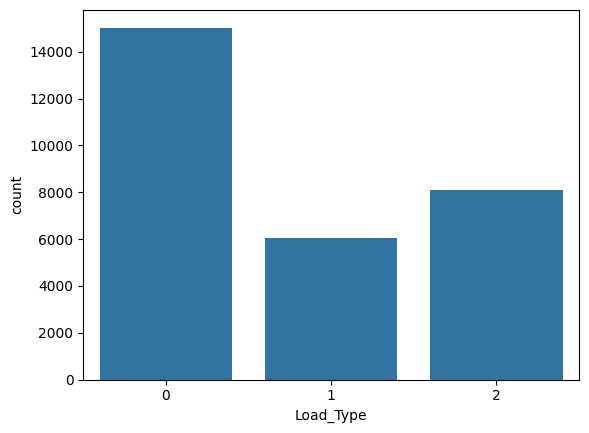

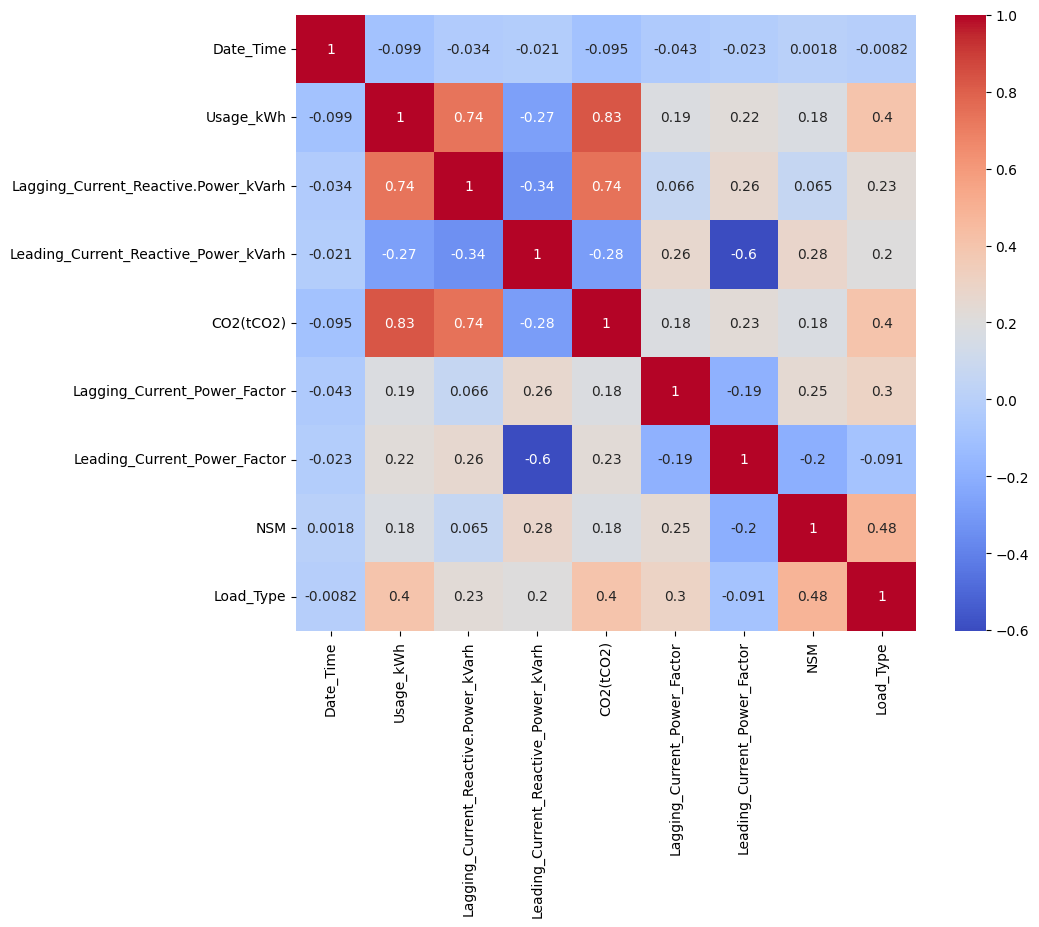

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of 'Load_Type'
sns.countplot(x='Load_Type', data=data)
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into training and testing sets
X = data.drop(['Date_Time', 'Load_Type'], axis=1)
y = data['Load_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [30]:
# Evaluation metrics
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3001
           1       0.79      0.79      0.79      1209
           2       0.78      0.79      0.79      1626

    accuracy                           0.87      5836
   macro avg       0.84      0.84      0.84      5836
weighted avg       0.87      0.87      0.87      5836



In [33]:
# Assuming 'Date' is sorted in ascending order
last_month_data = data[data['Date_Time'] >= data['Date_Time'].max() - pd.DateOffset(months=1)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the updated training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3001
           1       0.79      0.79      0.79      1209
           2       0.78      0.79      0.79      1626

    accuracy                           0.87      5836
   macro avg       0.84      0.84      0.84      5836
weighted avg       0.87      0.87      0.87      5836

